In [85]:
import numpy as np
import pandas as pd
from sklearn import datasets
# 这里直接引入sklearn里的数据集，iris鸢尾花
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target

df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['class'] = iris.target
df['class'] = df['class'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})
df.head(10)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [86]:
#分割数据集，比例为 训练集：测试集 = 8:2
X_train, X_test, Y_train, Y_test = train_test_split(iris_X, iris_Y, test_size=0.2, random_state=0)
#构建knn分类模型，并指定 k 值
KNN=KNeighborsClassifier(n_neighbors=3)
#使用训练集训练模型
KNN.fit(X_train,Y_train)
#评估模型的得分
score=KNN.score(X_test,Y_test)
print(score)

0.9666666666666667


In [93]:
pridect_result = KNN.predict(X_test)

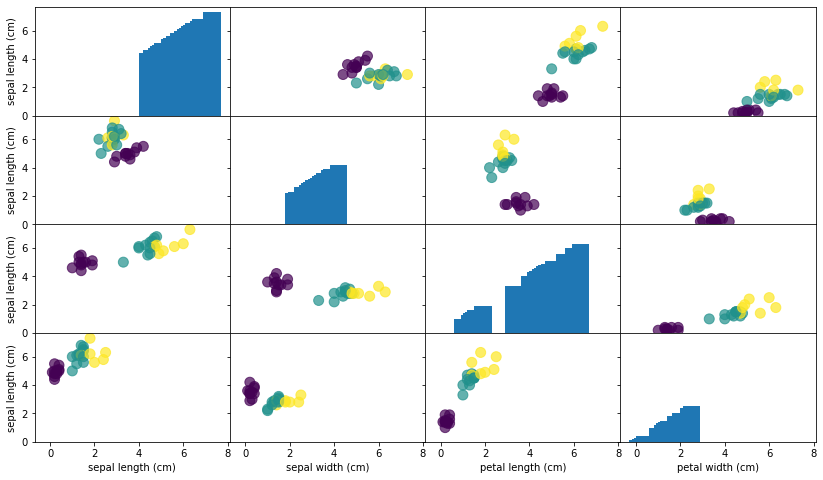

In [94]:
fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(14, 8))
for i in range(4):
    for j in range(4):
        if i == j:
            x = X_test[:,i]
            y = X_test[:,j]
            axes[i, j].bar(x, y)
        else:
#             plt.subplot(4, 4, i*4 + j + 1)
            x = X_test[:,i]
            y = X_test[:,j]
            axes[i, j].scatter(x, y,c=pridect_result, s=100,alpha=0.7)
        if i == 3:
            axes[i, j].set_xlabel(df.columns[j])
        if j == 0:
            axes[i, j].set_ylabel(df.columns[j])
# plt.tight_layout(pad=1)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [97]:
X_test, Y_test

(array([[5.8, 2.8, 5.1, 2.4],
        [6. , 2.2, 4. , 1. ],
        [5.5, 4.2, 1.4, 0.2],
        [7.3, 2.9, 6.3, 1.8],
        [5. , 3.4, 1.5, 0.2],
        [6.3, 3.3, 6. , 2.5],
        [5. , 3.5, 1.3, 0.3],
        [6.7, 3.1, 4.7, 1.5],
        [6.8, 2.8, 4.8, 1.4],
        [6.1, 2.8, 4. , 1.3],
        [6.1, 2.6, 5.6, 1.4],
        [6.4, 3.2, 4.5, 1.5],
        [6.1, 2.8, 4.7, 1.2],
        [6.5, 2.8, 4.6, 1.5],
        [6.1, 2.9, 4.7, 1.4],
        [4.9, 3.6, 1.4, 0.1],
        [6. , 2.9, 4.5, 1.5],
        [5.5, 2.6, 4.4, 1.2],
        [4.8, 3. , 1.4, 0.3],
        [5.4, 3.9, 1.3, 0.4],
        [5.6, 2.8, 4.9, 2. ],
        [5.6, 3. , 4.5, 1.5],
        [4.8, 3.4, 1.9, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [6.2, 2.8, 4.8, 1.8],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.8, 1.9, 0.4],
        [6.2, 2.9, 4.3, 1.3],
        [5. , 2.3, 3.3, 1. ],
        [5. , 3.4, 1.6, 0.4]]),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1

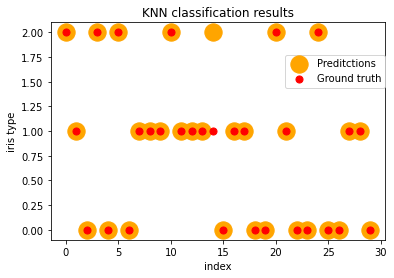

In [128]:
index = np.arange(len(pridect_result))
plt.scatter(index,pridect_result,s =300, c = 'orange', label = 'Preditctions' )
plt.scatter(index, Y_test,s = 50, c = 'red',label = 'Ground truth')
plt.title('KNN classification results')
plt.xlabel('index')
plt.ylabel('iris type')
plt.legend(loc = (0.7,0.7)) 
plt.show()